In [96]:
## Libraries
# lightkurve
#import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import random
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
#import statsmodels.api as sm
# import itertools
# import warnings

In [97]:
## Data
df = pd.read_csv("../0.Data/031381302.csv") #, index_col = "time")

# Check
print(df.shape)
#df.info()

## Time Series of interest
pdcsap = df.loc[:, ["time", "pdcsap_flux"]]
# # Set "time" as index
# pdcsap.set_index("time", inplace=True)
# pdcsap.sort_index(inplace=True)
pdcsap = pdcsap.sort_values("time")

# Check
print(pdcsap.shape); pdcsap.info(); pdcsap.head()

(17719, 24)
(17719, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17719 entries, 0 to 17718
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         17719 non-null  float64
 1   pdcsap_flux  17033 non-null  float64
dtypes: float64(2)
memory usage: 415.3 KB


,time,pdcsap_flux
0,1437.978646,NaN
1,1437.980034,NaN
2,1437.981423,NaN
3,1437.982812,NaN
4,1437.984201,NaN


In [98]:
# pdcsap.loc[4] = 10
# print(pdcsap.loc[4])

# print(pdcsap.iloc[[1, 4]])

# a = [1, 4]; print(type(a))
# b = np.arange(1, 3).tolist()
# print(pdcsap.iloc[b])

# print(len(pdcsap))
# pdcsap.append({"time": 1, "pdcsap_flux": np.nan})

In [115]:
# print(pdcsap.iloc[500])

# hm = np.arange(1, 4)
# pdcsap[1] = 1
# print(pdcsap.head())



# beh = pd.Index(hm, name = "time")
# print(beh)
# print(hm)
# pdcsap.loc[pd.Index(hm, name = "time")] = 1
# pdcsap.loc[hm]

# newRows = pd.DataFrame([[1, 2]], columns = ["time", "pdcsap_flux"])
# pd.concat([pdcsap, newRows])

print(pd.DataFrame({"time": 4, "pdcsap_flux": np.nan}, index = [0]))

   time  pdcsap_flux
0     4          NaN


## Reindex

In [100]:
# Identify large gap
ind_diffs = pdcsap["time"].diff()
print(ind_diffs.describe())


count    17718.000000
mean         0.001485
std          0.010208
min          0.001389
25%          0.001389
50%          0.001389
75%          0.001389
max          1.358323
Name: time, dtype: float64


In [101]:
# # Setup
# newLC = pdcsap.copy()
# med = ind_diffs.median()
# cur = 1

# # Iterate
# for k, id in enumerate(pdcsap.index):
#     if k == 0: continue
#     print(k, id)
#     diff = id - pdcsap.index[k - 1] #; print(diff)
#     diff_size = diff / med #; print(diff_size)
#     if diff_size < 2:
#         pass
#     elif diff_size == 2:
#         newLC.loc[pdcsap.index[cur] - med] = np.nan
#         cur += 1
#     else:
#         newInds = np.arange(start = pdcsap.index[k - 1] + med, stop = id - med, step = med); print(newInds)
#         newLC.loc[newInds] = np.nan
#         # newLC = newLC.set_value(newInds, np.nan)
#         cur += len(newInds)
#     cur += 1


In [120]:
# Setup
newLC = pdcsap.copy()
med = ind_diffs.median()
cur = 1

# Iterate
for k, id in enumerate(pdcsap["time"]):
    if k == 0: continue
    print(k, id)
    diff = id - pdcsap["time"][k - 1] #; print(diff)
    diff_size = diff / med; print(diff_size)
    if diff_size < 2:
        pass
    elif (diff_size >= 2) & (diff_size < 3):
        newRows = pd.DataFrame({"time": id - med, "pdcsap_flux": np.nan}, index = [0])
        newLC = pd.concat([newLC, newRows])
    else:
        newInds = np.arange(start = pdcsap["time"][k - 1] + med, stop = id - med, step = med); print(newInds)
        newRows = pd.DataFrame({"time": newInds, "pdcsap_flux": np.nan})
        newLC = pd.concat([newLC, newRows])


1 1437.9800344004182
0.9999965426128886
2 1437.9814232781732
0.9999965426128886
3 1437.9828121559574
0.999996563567742
4 1437.9842010337416
0.999996563567742
5 1437.9855899115255
0.9999965634040323
6 1437.98697878931
0.9999965637314518
7 1437.9883676671225
0.9999965840314662
8 1437.9897565449355
0.9999965843588857
9 1437.9911454227788
0.9999966061322881
10 1437.9925343006212
0.999996605477449
11 1437.9939231784629
0.9999966049863196
12 1437.9953120563052
0.999996605477449
13 1437.9967009341774
0.9999966269234318
14 1437.9980898120489
0.9999966264323025
15 1437.9994786899197
0.9999966259411731
16 1438.000867567791
0.9999966262685926
17 1438.0022564456922
0.9999966478782853
18 1438.0036453235928
0.9999966473871559
19 1438.0050342015218
0.99999666785088
20 1438.0064230794517
0.9999966685057192
21 1438.0078119573811
0.9999966681782996
22 1438.0092008353108
0.9999966683420094
23 1438.0105897132703
0.9999966897879923
24 1438.011978591229
0.9999966892968628
25 1438.0133674691872
0.99999668880

In [121]:
print(newLC.head())

print(newLC.describe())


          time  pdcsap_flux
0  1437.978646          NaN
1  1437.980034          NaN
2  1437.981423          NaN
3  1437.982812          NaN
4  1437.984201          NaN
               time   pdcsap_flux
count  18856.000000  17033.000000
mean    1451.163174   1564.459684
std        7.582118      9.316531
min     1437.978646   1530.508200
25%     1444.622710   1558.114900
50%     1451.176493   1564.397800
75%     1457.726120   1570.626300
max     1464.285468   1679.386400


In [122]:
## ROUGH WORK ##
# for i, x in enumerate(pdcsap.index[1:10]):
#     print(i, x)

# pdcsap.loc[pdcsap.index[1000]]["pdcsap_flux"]

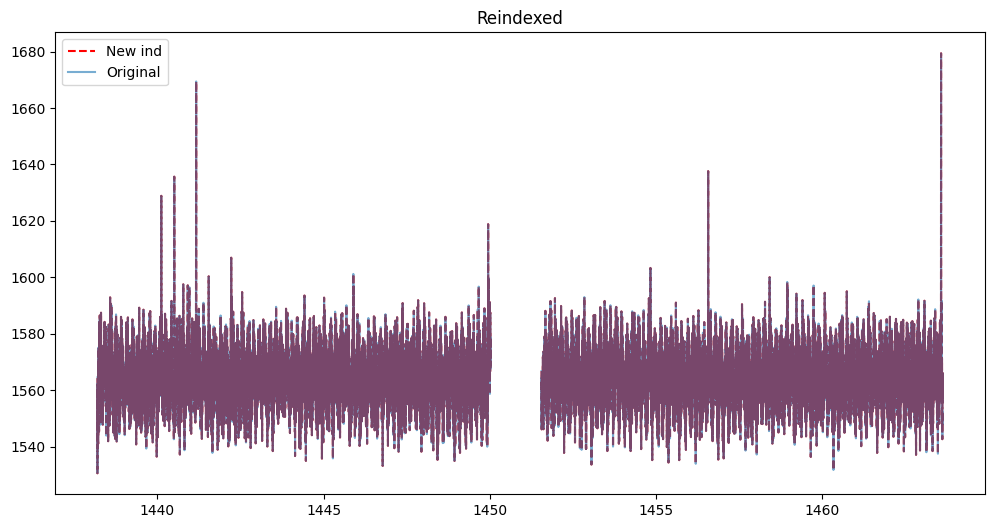

In [124]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(newLC["time"], newLC["pdcsap_flux"], label='New ind', linestyle='--', color='red')
plt.plot(pdcsap["time"], pdcsap["pdcsap_flux"], label='Original', alpha=0.6)
plt.title("Reindexed")
plt.legend()
plt.show()

In [ ]:
# Check
newLC.shape

(18856, 2)

In [ ]:
# Cleanup
newLC = newLC.sort_values("time")

newLC.head()

,time,pdcsap_flux
0,1437.978646,NaN
1,1437.980034,NaN
2,1437.981423,NaN
3,1437.982812,NaN
4,1437.984201,NaN


In [ ]:
# Check2
print(pdcsap.shape)

(17719, 2)